In [1]:
# entropy and information content
import math

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

print(entropy(0.5), entropy(0.1), entropy(0))
print(info_content(0.5), info_content(0.1), info_content(0))

print('info of a die, rolling a 4:', info_content(1/6), ' bits')

0.5 0.33219280948873625 0.0
1.0 3.321928094887362 0.0
info of a die, rolling a 4: 2.584962500721156  bits


In [2]:
equl_distr = [x/6 for x in range(6)]
lopside_distr = [1., 0, 0, 0, 0, 0]

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

print('equal distr entropy:', tot_entropy(equl_distr))
print('lopsides distr entropy:', tot_entropy(lopside_distr))

equal distr entropy: 2.068318255702844
lopsides distr entropy: 0.0


In [3]:
# max entropy weight matrix split
import numpy as np

def weight_matsplit(mat):
    '''split weight matrix into sections of max purity.'''
    if np.size(mat, 0) < 3 or np.size(mat, 1) < 3:
        return mat  # no split
    max_std = 0
    for si in range(1, np.size(mat, 0)):
        for sj in range(1, np.size(mat, 1)):
            s00 = tot_entropy(mat[:si, :sj].flatten())
            s10 = tot_entropy(mat[si:, :sj].flatten())
            s01 = tot_entropy(mat[:si, sj:].flatten())
            s11 = tot_entropy(mat[si:, sj:].flatten())
            current_std = np.std([s00, s10, s01, s11])
            if current_std > max_std:
                max_stdij = (si, sj)
                max_std = current_std
    return max_stdij  # return max stdeviation split

weight_mat = np.random.rand(4, 4)

print(weight_mat)
ws = weight_matsplit(weight_mat)
print(weight_mat[:ws[0], :ws[1]])
print(weight_mat[ws[0]:, :ws[1]])
print(weight_mat[:ws[0], ws[1]:])
print(weight_mat[ws[0]:, ws[1]:])

[[0.49532115 0.56157935 0.11390459 0.85018198]
 [0.77265022 0.7441597  0.41071229 0.63305764]
 [0.28784601 0.42296708 0.67218027 0.50057793]
 [0.90447039 0.41331618 0.20941567 0.02642781]]
[[0.49532115 0.56157935 0.11390459]
 [0.77265022 0.7441597  0.41071229]
 [0.28784601 0.42296708 0.67218027]]
[[0.90447039 0.41331618 0.20941567]]
[[0.85018198]
 [0.63305764]
 [0.50057793]]
[[0.02642781]]


In [14]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer', 'computer', 'computer']]
dct = Dictionary(texts)  # initialize a Dictionary
dct.add_documents([["cat", "say", "meow"], ["dog", "dog"], ['computer']])  # add more document (extend the vocabulary)
#dct.doc2bow(["dog", "computer", "non_existent_word"])

print(dct.token2id['computer'])
print(dct.cfs[dct.token2id['computer']], dct.dfs[dct.token2id['computer']])  # cfs: overall token frequencies, dfc: # of docs containing token
print(dct.cfs)
print(dct.dfs)

0
4 2
{1: 1, 2: 1, 0: 4, 3: 1, 5: 1, 4: 1, 6: 2}
{1: 1, 2: 1, 0: 2, 3: 1, 5: 1, 4: 1, 6: 1}


In [18]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)

doc_tokenized = [
   simple_preprocess(line, deacc = True, min_len=1, max_len=20) for line in open('lesmiserables.txt', encoding='utf-8')
]
dictionary = corpora.Dictionary(doc_tokenized)

#BoW_corpus = [
#   dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized
#]
#print(BoW_corpus)

In [19]:
print(sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True))

[(28, 27504), (16, 16382), (9, 13630), (63, 12269), (36, 11694), (57, 10088), (92, 8078), (93, 7716), (143, 7161), (115, 5873), (98, 5559), (168, 5537), (58, 5381), (137, 4844), (69, 4225), (73, 4213), (170, 3820), (112, 3801), (117, 3585), (259, 3026), (6, 3021), (334, 2915), (10, 2798), (125, 2788), (134, 2723), (276, 2612), (19, 2514), (241, 2369), (123, 2341), (2, 2333), (133, 2310), (75, 2246), (434, 2152), (223, 2091), (96, 2031), (368, 2018), (48, 1949), (353, 1948), (44, 1915), (158, 1885), (109, 1830), (153, 1783), (213, 1754), (121, 1752), (131, 1471), (14432, 1321), (146, 1311), (585, 1205), (120, 1167), (646, 1157), (154, 1127), (122, 1116), (18, 1114), (4592, 1092), (330, 1077), (318, 1055), (237, 1042), (557, 1031), (108, 1019), (633, 1014), (273, 1005), (239, 1003), (7837, 987), (485, 979), (243, 969), (248, 963), (387, 963), (860, 943), (357, 940), (697, 909), (145, 888), (157, 879), (85, 868), (65, 859), (100, 853), (373, 850), (142, 841), (505, 787), (307, 775), (371,

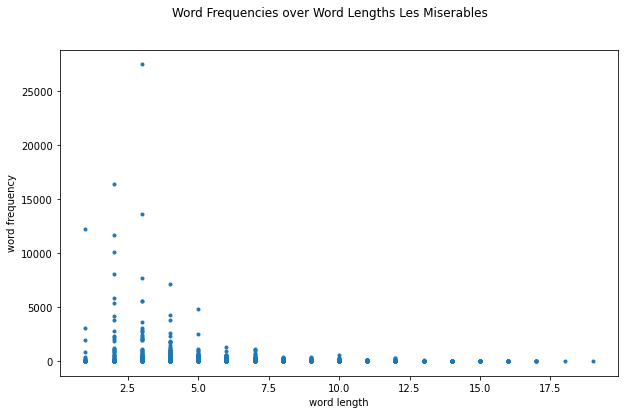

In [58]:
# lenght of token vs. frequency
import matplotlib.pyplot as plt

token_frq = sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True)
Xll = [len(dictionary[item[0]]) for item in token_frq]  # token lengths
Ylf = [item[1] for item in token_frq]  # token frequencies

fig, ax1 = plt.subplots(1, 1)
fig.suptitle("Word Frequencies over Word Lengths Les Miserables")
ax1.set(xlabel='word length', ylabel='word frequency')
fig.set_size_inches(10, 6)
ax1.scatter(Xll, Ylf, marker='.')

In [21]:
dictionary.token2id['a']

63

In [29]:
print(dictionary[27], dictionary[15], dictionary[8], dictionary[35])
print(dictionary[22655], dictionary[22656], dictionary[22654], dictionary[22653])

the of and to
fafiot_ serieux fafiot conch


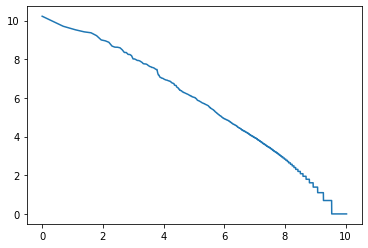

In [22]:
import math
import matplotlib.pyplot as plt

diclst = sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True)
Xreg = [math.log(x) for x in range(1, len(diclst)+1)]
Yreg = [math.log(x[1]) for x in diclst]
plt.plot(Xreg, Yreg)
plt.show()

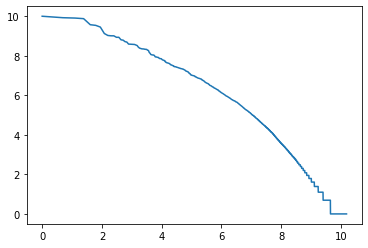

In [39]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)

doc_tokenized_sci = [
   simple_preprocess(line, deacc=True, min_len=1, max_len=20) for line in open('bsc_corpus0.txt', encoding='utf-8')  # 9000 studies MF
]
dict_sci = corpora.Dictionary(doc_tokenized_sci)

diclst_sci = sorted(dict_sci.dfs.items(), key=lambda item: item[1], reverse=True)
Xsci = [math.log(x) for x in range(1, len(diclst_sci)+1)]
Ysci = [math.log(x[1]) for x in diclst_sci]
plt.plot(Xsci, Ysci)
plt.show()

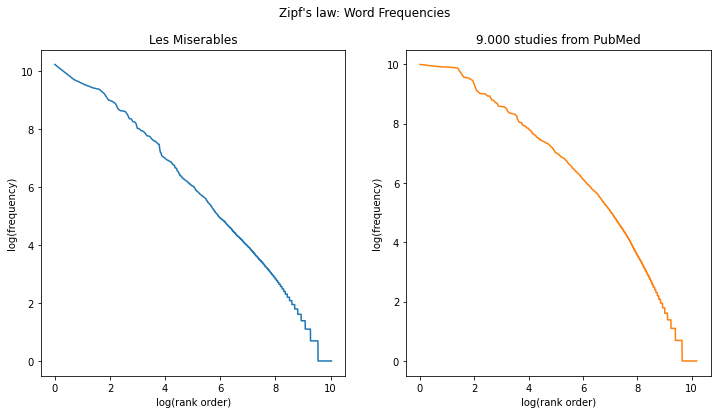

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

fig.suptitle("Zipf's law: Word Frequencies")
ax1.plot(Xreg, Yreg)
ax2.plot(Xsci, Ysci, 'tab:orange')
ax1.set_title('Les Miserables')
ax1.set(xlabel='log(rank order)', ylabel='log(frequency)')
ax2.set_title('9.000 studies from PubMed')
ax2.set(xlabel='log(rank order)', ylabel='log(frequency)')

fig.savefig('zipf_comp0.png', dpi=100, bbox_inches = 'tight', pad_inches=0.2)

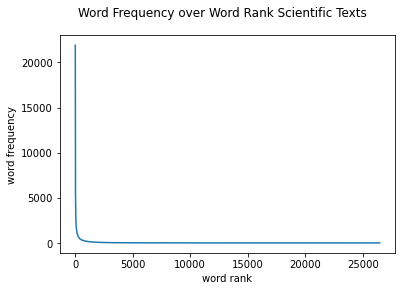

In [49]:
Xsci = [x for x in range(1, len(diclst_sci)+1)]
Ysci = [x[1] for x in diclst_sci]

fig, ax1 = plt.subplots(1, 1)
fig.suptitle("Word Frequency over Word Rank Scientific Texts")
ax1.set(xlabel='word rank', ylabel='word frequency')

ax1.plot(Xsci, Ysci)

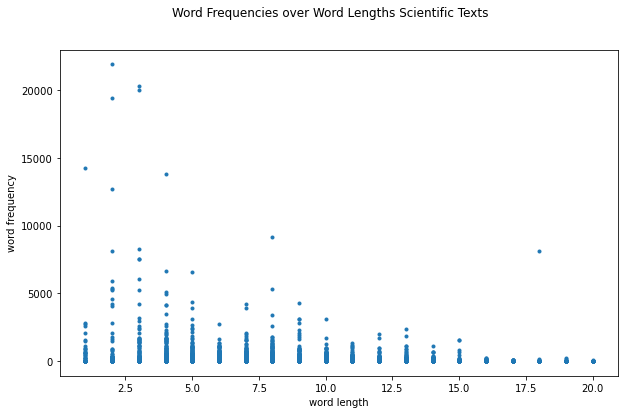

In [59]:
# lenght of token vs. frequency
import matplotlib.pyplot as plt

token_frq = sorted(dict_sci.dfs.items(), key=lambda item: item[1], reverse=True)
Xsll = [len(dict_sci[item[0]]) for item in token_frq]  # token lengths
Yslf = [item[1] for item in token_frq]  # token frequencies

fig, ax1 = plt.subplots(1, 1)
fig.suptitle("Word Frequencies over Word Lengths Scientific Texts")
ax1.set(xlabel='word length', ylabel='word frequency')
fig.set_size_inches(10, 6)
ax1.scatter(Xsll, Yslf, marker='.')

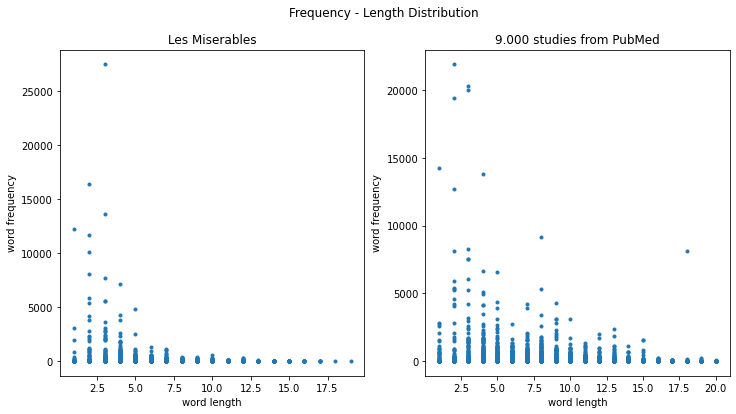

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

fig.suptitle("Frequency - Length Distribution")
ax1.scatter(Xll, Ylf, marker='.')
ax2.scatter(Xsll, Yslf, marker='.')
ax1.set_title('Les Miserables')
ax1.set(xlabel='word length', ylabel='word frequency')
ax2.set_title('9.000 studies from PubMed')
ax2.set(xlabel='word length', ylabel='word frequency')

fig.savefig('lf_comp0.png', dpi=100, bbox_inches = 'tight', pad_inches=0.2)

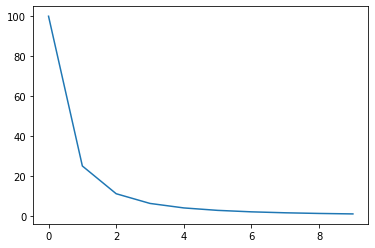

number of authors: [100.0, 25.0, 11.11111111111111, 6.25, 4.0, 2.7777777777777777, 2.0408163265306123, 1.5625, 1.2345679012345678, 1.0] 154.97677311665404
cumulative authors: [100.0, 125.0, 136.11111111111111, 142.36111111111111, 146.36111111111111, 149.13888888888889, 151.1797052154195, 152.7422052154195, 153.97677311665404, 154.97677311665404]
articles written by author tier: [100.0, 50.0, 33.33333333333333, 25.0, 20.0, 16.666666666666664, 14.285714285714286, 12.5, 11.11111111111111, 10.0]
292.89682539682536
12.449899597988733 146.5 142.87
compare to Pareto: 234.4 31.0 30.04234 writing 143


In [50]:
# Lotka's Law https://en.wikipedia.org/wiki/Lotka%27s_law
import math
import matplotlib.pyplot as plt

def lotka(x, n, c):
    return c / x ** n

lotka_smpl = [lotka(x, 2, 100) for x in range(1, 11)]
plt.plot(lotka_smpl)
plt.show()

print('number of authors:', lotka_smpl, sum(lotka_smpl))
print('cumulative authors:', [sum(lotka_smpl[:idx]) for idx in range(1, len(lotka_smpl)+1)])
print('articles written by author tier:', [lotka_smpl[idx] * (idx+1) for idx in range(0, len(lotka_smpl))])

print(sum([100.0, 50.0, 33.33333333333333, 25.0, 20.0, 16.666666666666664, 14.285714285714286, 12.5, 11.11111111111111, 10.0]))

print(math.sqrt(155), .5*293, sum([33.333, 25.0, 20.0, 16.64, 14.286, 12.5, 11.111, 10.0]))

print('compare to Pareto:', .8*293, .2*155, sum([11.11111, 6.25, 4.0, 2.8, 2.04123, 1.56, 1.28, 1.0]), 'writing', 143)

In [1]:
def a_triang(n):
    return 5 / 4 * (3/4) ** n

print(sum([a_triang(n) for n in range(100)]))

4.999999999998396


In [1]:
# skipping lectures
import random

def attend_conf(n):
    res = [0, 0]
    for i in range(n):
        if random.choice([0, 1]) == 0:
            res[0] += 1
        else:
            res[1] += 1
    return res

def count_same(attend_lst):
    res = 0
    for i in range(len(attend_lst)):
        if attend_lst[i][0] == attend_lst[i][1]:
            res += 1
    return res

#print(attend_conf(10))
#print([attend_conf(10) for i in range(10)])
#print(count_same([attend_conf(10) for i in range(11)]))
#print(count_same([attend_conf(10) for i in range(21)]))
#print(count_same([attend_conf(10) for i in range(101)]))

n_attend = 1025
nt = 1000
dct = 0
for t in range(nt):
    if count_same([attend_conf(10) for i in range(11)]) > 0:
        dct += 1
print(dct/nt)

0.96


In [7]:
'''Jaro distance'''
from __future__ import division
 
def jaro(s, t):
    '''Jaro distance between two strings.'''
    s_len = len(s)
    t_len = len(t)
 
    if s_len == 0 and t_len == 0:
        return 1
 
    match_distance = (max(s_len, t_len) // 2) - 1
 
    s_matches = [False] * s_len
    t_matches = [False] * t_len
 
    matches = 0
    transpositions = 0
 
    for i in range(s_len):
        start = max(0, i - match_distance)
        end = min(i + match_distance + 1, t_len)
 
        for j in range(start, end):
            if t_matches[j]:
                continue
            if s[i] != t[j]:
                continue
            s_matches[i] = True
            t_matches[j] = True
            matches += 1
            break
 
    if matches == 0:
        return 0
 
    k = 0
    for i in range(s_len):
        if not s_matches[i]:
            continue
        while not t_matches[k]:
            k += 1
        if s[i] != t[k]:
            transpositions += 1
        k += 1
 
    return ((matches / s_len) +
            (matches / t_len) +
            ((matches - transpositions / 2) / matches)) / 3
 
def main():
    '''Tests'''
 
    for s, t in [('MARTHA', 'MARHTA'),
                 ('DIXON', 'DICKSONX'),
                 ('JELLYFISH', 'SMELLYFISH'),
                ('this is a test', 'and this is another test')]:
        print("jaro(%r, %r) = %.10f" % (s, t, jaro(s, t)))
 
 
if __name__ == '__main__':
    main()

jaro('MARTHA', 'MARHTA') = 0.9444444444
jaro('DIXON', 'DICKSONX') = 0.7666666667
jaro('JELLYFISH', 'SMELLYFISH') = 0.8962962963
jaro('this is a test', 'and this is another test') = 0.7301587302


In [1]:
import math

def z_val(x, y):
    return 12 - x - y

ctr = 0
low_lim = 1
for x in range(low_lim, 13):
    for y in range(low_lim, 13):
        if z_val(x, y) > (low_lim - 1):
            ctr += 1

print(ctr)

55


In [1]:
def meow(w, o, m):
    return ( 504*w + 40*o - 1000*m ) / 100

print(meow(5, 7, 2))

8.0


# Genetic Algorithms: NN Opt

In [1]:
# https://archive.ics.uci.edu/ml/datasets/Iris
from sklearn import datasets

data = datasets.load_iris()
X = data['data']
Y = data['target']

In [2]:
from sklearn import model_selection
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings

class MlpLayersTest:

    NUM_FOLDS = 5

    def __init__(self, randomSeed):
        self.randomSeed = randomSeed
        self.initDataset()
        #self.kfold = model_selection.KFold(n_splits=self.NUM_FOLDS, random_state=self.randomSeed)
        self.kfold = model_selection.KFold(n_splits=self.NUM_FOLDS)

    def initDataset(self):
        self.data = datasets.load_iris()
        self.X = self.data['data']
        self.y = self.data['target']

    # params contains: [layer_1_size, layer_2_size, layer_3_size, layer_4_size]
    def convertParams(self, params):
        # transform the layer sizes from float (possibly negative) values into hiddenLayerSizes tuple:
        if round(params[1]) <= 0:
            hiddenLayerSizes = round(params[0]),
        elif round(params[2]) <= 0:
            hiddenLayerSizes = (round(params[0]), round(params[1]))
        elif round(params[3]) <= 0:
            hiddenLayerSizes = (round(params[0]), round(params[1]), round(params[2]))
        else:
            hiddenLayerSizes = (round(params[0]), round(params[1]), round(params[2]), round(params[3]))
        return hiddenLayerSizes

    @ignore_warnings(category=ConvergenceWarning)
    def getAccuracy(self, params):
        hiddenLayerSizes = self.convertParams(params)  # get current layer configuration
        self.classifier = MLPClassifier(random_state=self.randomSeed,
                                        hidden_layer_sizes=hiddenLayerSizes)
        cv_results = model_selection.cross_val_score(self.classifier,
                                                     self.X,
                                                     self.y,
                                                     cv=self.kfold,
                                                     scoring='accuracy')  # find accuracy
        return cv_results.mean()

    def formatParams(self, params):
        return "'hidden_layer_sizes'={}".format(self.convertParams(params))

In [4]:
RANDOM_SEED = 42
test = MlpLayersTest(RANDOM_SEED)
test.initDataset()
test.getAccuracy([ 15,  5, 8, -20])

0.8666666666666666

In [5]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)
        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)
        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)
        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook



In [6]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy

#import mlp_layers_test
#import elitism

# boundaries for layer size parameters:
# [layer_layer_1_size, hidden_layer_2_size, hidden_layer_3_size, hidden_layer_4_size]
BOUNDS_LOW =  [ 5,  -5, -10, -20]
BOUNDS_HIGH = [15,  10,  10,  10]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.5   # probability for mutating an individual
MAX_GENERATIONS = 10
HALL_OF_FAME_SIZE = 3
CROWDING_FACTOR = 10.0  # crowding factor for crossover and mutation

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy test class to test various combinations of hidden layers
#test = mlp_layers_test.MlpLayersTest(RANDOM_SEED)
test = MlpLayersTest(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)  # objective fitness max strategy

# define the layer_size_attributes individually:
for i in range(NUM_OF_PARAMS):
    # "layer_size_attribute_0", "layer_size_attribute_1", ...
    toolbox.register("layer_size_attribute_" + str(i),
                     random.uniform,
                     BOUNDS_LOW[i],
                     BOUNDS_HIGH[i])
# create a tuple containing an layer_size_attribute generator for each hidden layer:
layer_size_attributes = ()
for i in range(NUM_OF_PARAMS):
    layer_size_attributes = layer_size_attributes + \
                            (toolbox.__getattribute__("layer_size_attribute_" + str(i)),)
# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator",
                 tools.initCycle,
                 creator.Individual,
                 layer_size_attributes,
                 n=1)
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)  # fill up individual instance

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)
# genetic operators:mutFlipBit
# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate",
                 tools.cxSimulatedBinaryBounded,
                 low=BOUNDS_LOW,
                 up=BOUNDS_HIGH,
                 eta=CROWDING_FACTOR)
toolbox.register("mutate",
                 tools.mutPolynomialBounded,
                 low=BOUNDS_LOW,
                 up=BOUNDS_HIGH,
                 eta=CROWDING_FACTOR,
                 indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow:
def main():
    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)
    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    # perform the Genetic Algorithm flow with hof (hall of fame = current best individuals) feature added:
    population, logbook = eaSimpleWithElitism(population,
                                                      toolbox,
                                                      cxpb=P_CROSSOVER,
                                                      mutpb=P_MUTATION,
                                                      ngen=MAX_GENERATIONS,
                                                      stats=stats,
                                                      halloffame=hof,
                                                      verbose=True)
    # print best solution found:
    print("- Best solution is: ",
          test.formatParams(hof.items[0]),
          ", accuracy = ",
          hof.items[0].fitness.values[0])

if __name__ == "__main__":
    main()

gen	nevals	max     	avg     
0  	20    	0.666667	0.416333
1  	17    	0.693333	0.487   
2  	15    	0.76    	0.537333
3  	14    	0.76    	0.550667
4  	17    	0.76    	0.568333
5  	17    	0.76    	0.653667
6  	14    	0.76    	0.589333
7  	15    	0.76    	0.618   
8  	16    	0.866667	0.616667
9  	16    	0.866667	0.666333
10 	16    	0.866667	0.722667
- Best solution is:  'hidden_layer_sizes'=(15, 5, 8) , accuracy =  0.8666666666666666


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

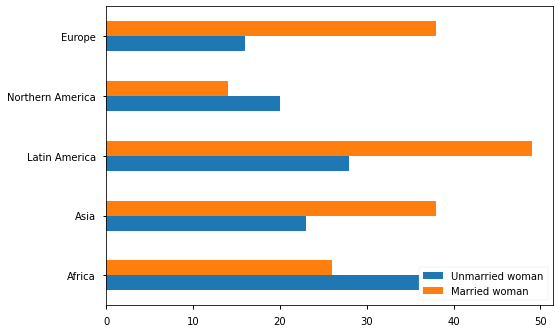

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-notebook')

unmarried_labels = ['30–55', '14–50', '16-59', '16-24', '13-26']
married_labels = ['25–50', '29–59', '34–89', '11–18', '33–55']
all_labels = [unmarried_labels, married_labels]

df = pd.DataFrame({'Unmarried woman': [36, 23, 28, 20, 16],
                   'Married woman': [26, 38, 49, 14, 38]},
                  columns=['Unmarried woman', 'Married woman'],
                  index=['Africa', 'Asia', 'Latin America', 'Northern America',
                         'Europe'])

# Save axes returned from DataFrame plot
ax = df.plot.barh()
# Iterate over containers and all_labels together
for container, labels in zip(ax.containers, all_labels):
    ax.bar_label(container, labels=labels, label_type='center')

plt.title(
    'Abortion rate per 1000 women aged 15–44 y. by marital status (2010–2014)',
    fontweight='bold',
    fontsize=11
)

plt.tight_layout()
plt.show()

In [1]:
4.5/12*9

3.375

In [1]:
import random

def hotw(weight_hd, weight_tl):
    return random.choices((0, 1), (weight_hd, weight_tl))[0]

nruns = 1000
plr0 = 0
plr1 = 0
for i in range(nruns):
    wp0 = plr0/(i + 1)
    wp1 = plr1/(i + 1)
    plr0 += hotw(wp0, 1 - wp0)
    plr1 += hotw(wp1, 1 - wp1)
print(wp0, wp1)

0.488 0.513


In [1]:
import math

print(0.55*0.17, .63/.4)

0.09350000000000001 1.575


In [6]:
def chck(y, h, t, e):
    return - 9*y + 90*h + 900*t - 92*e

print(chck(8, 0, 1, 9))

0


In [1]:
18.9+13.9+9.7+4.4+4.2+12.8+9.1

73.0

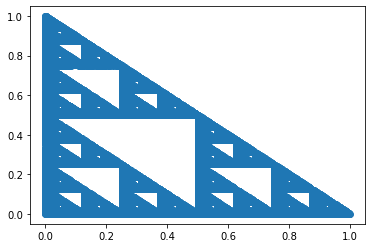

In [1]:
# fractals via midpoints
import random
import matplotlib.pyplot as plt

vertex_list = [(0, 0), (1, 0), (0, 1)]

def rdpt(a):
    while True:
        x = a * random.random()
        y = a * random.random()
        if x+y < a:
            return (x, y)
        
def rnd_vertex(v_list):
    return random.choice(v_list)

def next_point(this_point, v_list):
    rv = rnd_vertex(v_list)
    return (this_point[0] + (rv[0]-this_point[0])/2, this_point[1] + (rv[1]-this_point[1])/2)

point_list_x = []
point_list_y = []
np = next_point(rdpt(1), vertex_list)
for i in range(50000):
    point_list_x.append(np[0])
    point_list_y.append(np[1])
    np = next_point(np, vertex_list)
    
plt.scatter(point_list_x, point_list_y)
plt.show()

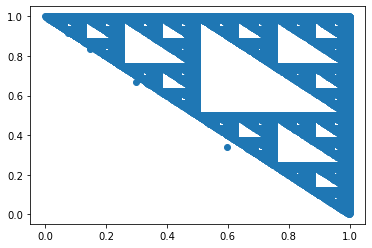

In [4]:
# fractals via midpoints 2
import random
import matplotlib.pyplot as plt

vertex_list = [(0, 0), (1, 0), (1, 1), (0, 1)]
last_v = (0, 0)

def rdpt(a):
    x = a * random.random()
    y = a * random.random()
    return (x, y)
        
def rnd_vertex(v_list):
    vx = random.choice(v_list)
    while vx == last_v:
        vx = random.choice(v_list)
    return vx

def next_point(this_point, v_list):
    rv = rnd_vertex(v_list)
    return (this_point[0] + (rv[0]-this_point[0])/2, this_point[1] + (rv[1]-this_point[1])/2)

point_list_x = []
point_list_y = []
np = next_point(rdpt(1), vertex_list)
for i in range(50000):
    point_list_x.append(np[0])
    point_list_y.append(np[1])
    np = next_point(np, vertex_list)
    
plt.scatter(point_list_x, point_list_y)
plt.show()

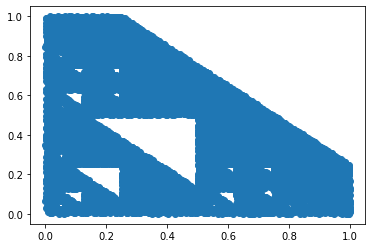

In [8]:
# fractals via midpoints 3
import random
import matplotlib.pyplot as plt

vertex_list = [(0, 0), (1, 0), (1, 0.25), (0.25, 1), (0, 1)]

def rdpt(a):
    while True:
        x = a * random.random()
        y = a * random.random()
        if x+y < a:
            return (x, y)
        
def rnd_vertex(v_list):
    return random.choice(v_list)

def next_point(this_point, v_list):
    rv = rnd_vertex(v_list)
    return (this_point[0] + (rv[0]-this_point[0])/2, this_point[1] + (rv[1]-this_point[1])/2)

point_list_x = []
point_list_y = []
np = next_point(rdpt(1.5), vertex_list)
for i in range(50000):
    point_list_x.append(np[0])
    point_list_y.append(np[1])
    np = next_point(np, vertex_list)
    
plt.scatter(point_list_x, point_list_y)
plt.show()

In [15]:
import random

def play_game(res):
    roll = random.choice([1, 2, 3, 4, 5, 6])
    if roll != 6:
        return res + roll
    return play_game(res + 6)
    
#print(play_game(0))

total = 0
for i in range(1000):
    total += play_game(0)
    
print(total/1000)

4.151


In [3]:
import requests
from bs4 import BeautifulSoup
import os.path
from dateutil import parser
import pandas as pd
import numpy as np

BASE_DIR = r'C:\Users\bscho\Documents\DL\lrgtxt0'

def download_article(url):
    # check if article already there
    filename = url.split("/")[-1] + ".html"
    filename = f"{BASE_DIR}/ch09/" + filename
    if not os.path.isfile(filename):
        r = requests.get(url)
        with open(filename, "w+") as f:
            f.write(r.text)
    return filename

def parse_article(article_file):
    with open(article_file, "r") as f:
        html = f.read()
    r = {}
    soup = BeautifulSoup(html, 'html.parser')
    r['id'] = soup.select_one("div.StandardArticle_inner-container")['id']
    r['url'] = soup.find("link", {'rel': 'canonical'})['href']
    r['headline'] = soup.h1.text
    r['section'] = soup.select_one("div.ArticleHeader_channel a").text
    
    r['text'] = soup.select_one("div.StandardArticleBody_body").text
    r['authors'] = [a.text 
                    for a in soup.select("div.BylineBar_first-container.ArticleHeader_byline-bar\
                                          div.BylineBar_byline span")]
    r['time'] = soup.find("meta", { 'property': "og:article:published_time"})['content']
    return r

import reprlib
r = reprlib.Repr()
r.maxstring = 800

url1 = "https://www.reuters.com/article/us-qualcomm-m-a-broadcom-5g/what-is-5g-and-who-are-the-major-players-idUSKCN1GR1IN"
article_name1 = download_article(url1)
article1 = parse_article(article_name1)
print ('Article Published on', r.repr(article1['time']))
print (r.repr(article1['text']))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bscho\\Documents\\DL\\lrgtxt0/ch09/what-is-5g-and-who-are-the-major-players-idUSKCN1GR1IN.html'

In [4]:
article2 = {'text': 'LONDON/SAN FRANCISCO (Reuters) - U.S. President Donald Trump has blocked microchip maker Broadcom Ltd’s (AVGO.O) $117 billion takeover of rival Qualcomm (QCOM.O) amid concerns that it would give China the upper hand in the next generation of mobile communications, or 5G. A 5G sign is seen at the Mobile World Congress in Barcelona, Spain February 28, 2018. REUTERS/Yves HermanBelow are some facts... 4G wireless and looks set to top the list of patent holders heading into the 5G cycle. Huawei, Nokia, Ericsson and others are also vying to amass 5G patents, which has helped spur complex cross-licensing agreements like the deal struck late last year Nokia and Huawei around handsets. Editing by Kim Miyoung in Singapore and Jason Neely in LondonOur Standards:The Thomson Reuters Trust Principles.'}

In [7]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.nlp.tokenizers import Tokenizer
from nltk import tokenize

LANGUAGE = "english"

parser = PlaintextParser.from_string(article2['text'], Tokenizer(LANGUAGE))
summarizer = TextRankSummarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, num_summary_sentence):
    print (str(sentence))

LookupError: NLTK tokenizers are missing. Download them by following command: python -c "import nltk; nltk.download('punkt')"

In [4]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.text_rank import TextRankSummarizer

def textrank_summary(text, num_summary_sentence):
    summary_sentence = []
    LANGUAGE = "english"
    stemmer = Stemmer(LANGUAGE)
    parser = PlaintextParser.from_string(text, Tokenizer(LANGUAGE))
    summarizer = TextRankSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)
    for sentence in summarizer(parser.document, num_summary_sentence):
        summary_sentence.append(str(sentence))
    return summary_sentence

ModuleNotFoundError: No module named 'sumy'

In [5]:
parser = PlaintextParser.from_string(article1['text'], Tokenizer(LANGUAGE))
summarizer = TextRankSummarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, num_summary_sentence):
    print (str(sentence))

NameError: name 'PlaintextParser' is not defined

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bscho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
# Load Packages
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

document1 ="""Machine learning (ML) is the scientific study of algorithms and statistical models that computer 
systems use to progressively improve their performance on a specific task. Machine learning algorithms build a 
mathematical model of sample data, known as "training data", in order to make predictions or decisions without 
being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email 
filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of 
specific instructions for performing the task. Machine learning is closely related to computational statistics, which 
focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and 
application domains to the field of machine learning. Data mining is a field of study within machine learning, and 
focuses on exploratory data analysis through unsupervised learning.In its application across business problems, machine 
learning is also referred to as predictive analytics."""

# For Strings
parser = PlaintextParser.from_string(document1,Tokenizer("english"))

# Using LexRank
summarizer = LexRankSummarizer()
# Summarize the document with 2 sentences
#summary = summarizer(parser.document, 2)
# Summarize the document with 1 sentence
summary = summarizer(parser.document, 1)

for sentence in summary:
    print(sentence)

Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task.


In [9]:
# abstract summary test
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

document1 ="""This study aimed to detect patients' characteristics who suffered severe and critical COVID-19 
pneumonia admitted to the post-acute COVID-19 rehabilitation clinic in Ankara City Hospital, Physical Medicine 
and Rehabilitation Hospital and to share our experiences and outcomes of rehabilitation programmes applied. 
This study was designed as a single-centre, retrospective, observational study. Severe and critical COVID-19 
patients, admitted to the post-acute COVID-19 rehabilitation clinic, were included in patient-based rehabilitation 
programmes, targeting neuromuscular and respiratory recovery. Functional status, oxygen (O2) requirement and daily 
living activities were assessed before and after rehabilitation. Eighty-five patients, of which 74% were male, were 
analysed, with the mean age of 58.27 ± 11.13 and mean body mass index of 25.29 ± 4.81 kg/m2. The most prevalent 
comorbidities were hypertension (49.4%) and diabetes mellitus (34.1%). Of the 85 patients, 84 received antiviral 
drugs, 81 low-molecular-weight heparin, 71 corticosteroids, 11 anakinra, 4 tocilizumab, 16 intravenous immunoglobulin 
and 6 plasmapheresis. 78.8% of the patients were admitted to the intensive care unit, with a mean length of stay of 
19.41 ± 18.99 days, while those who needed O2 support with mechanic ventilation was 36.1%. Neurological complications, 
including Guillain-Barré syndrome, critical illness-related myopathy/neuropathy, cerebrovascular disease and steroid 
myopathy, were observed in 39 patients. On initial functional statuses, 55.3% were bedridden, 22.4% in wheelchair 
level and 20% mobilised with O2 support. After rehabilitation, these ratios were 2.4%, 4.7% and 8.2%, respectively. 
During admission, 71 (83.5%) patients required O2 support, but decreased to 7 (8.2%) post-rehabilitation. Barthel Index 
improved statistically from 44.82 ± 27.31 to 88.47 ± 17.56. Patient-based modulated rehabilitation programmes are highly 
effective in severe and critical COVID-19 complications, providing satisfactory well-being in daily living activities."""

# For Strings
parser = PlaintextParser.from_string(document1,Tokenizer("english"))

# Using LexRank
summarizer = LexRankSummarizer()
summary = summarizer(parser.document, 2)

for sentence in summary:
    print(sentence)

This study aimed to detect patients' characteristics who suffered severe and critical COVID-19 pneumonia admitted to the post-acute COVID-19 rehabilitation clinic in Ankara City Hospital, Physical Medicine and Rehabilitation Hospital and to share our experiences and outcomes of rehabilitation programmes applied.
Patient-based modulated rehabilitation programmes are highly effective in severe and critical COVID-19 complications, providing satisfactory well-being in daily living activities.


In [1]:
import itertools

wrong_list = list(itertools.permutations(range(0, 9), 7))
for wr in wrong_list:
    wval = 2 * (10000*wr[0] + 1000*wr[1] + 10*wr[2] + wr[3])
    rval = 10000*wr[1] + 1000*wr[4] + 100*wr[3] + 10*wr[5] + wr[6]
    if wval == rval:
        print(wval, rval, wr)

74102 74102 (3, 7, 5, 1, 4, 0, 2)
74162 74162 (3, 7, 8, 1, 4, 6, 2)


In [1]:
from math import sqrt

def qmean(num):
    return sqrt(sum(n*n for n in num)/len(num))
 
qmean(range(1,11))

6.2048368229954285